In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04c68ed96adcc36701de649af633f563


In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-76.07779123494458 173.66194925645794
-1.7784327301050098 -176.67287230826688
-82.19157755173566 147.11061842464125
5.897378872156551 60.86370305231742
11.195658544353634 48.515613237357854
42.9560406048364 133.9567525110018
51.24993419826319 140.09880471873805
-47.375204485875045 -70.18498549618889
54.153552653383116 -164.69562519897096
48.51295566730761 106.0723473752596
79.77484804235345 143.29134610172355
87.82758907323716 87.64196399338459
17.984200938291195 -32.19505217361774
52.80729519844786 120.55388093048629
-18.949987871164893 -165.1102064556133
-31.852704635236293 -120.65893751016634
-19.4375831912637 30.02798298461161
-20.25187654678153 22.245447233175412
80.02043878641706 101.22068675761193
85.13247163132047 134.94463492291658
40.14261964776418 -143.95718877070468
79.01917400735368 -72.95737634841481
-72.76140603871377 -67.53172075617398
-8.24215277821692 125.52900382273072
79.77374801583181 46.23285719566297
43.17259700592729 -169.98639497428738
-41.71964027095484 -114.6

-89.148741482775 -152.09272080829064
84.31457078521248 133.35149839180826
-48.22570304360659 87.39478581724688
-27.48460316625102 137.85936149673904
65.7370716916891 133.37616542151318
-32.437586605429125 -83.51306194970263
59.30723006115002 133.95590088515155
28.458343975145624 115.0881664790337
65.98273266671382 -110.64498183003147
31.179058024826446 -40.699451006943946
56.12689472854018 -39.058833403348444
87.5255220383957 138.28576981223682
-43.77608744771277 82.48468632505336
44.816068694254085 107.90283296372354
-34.940754235251696 29.586702495026373
-85.69885527421181 -157.3824325491317
-63.91591510163896 -81.65973869413673
-46.55161407933137 -79.75448190898481
46.46179634278349 -30.21266959319709
36.79284941645979 153.06368072273602
-75.56195797215489 93.59696992308665
3.050523152809106 -28.1845227969402
-64.09461146199942 160.1716763500724
-7.859086175798097 29.388836560016472
77.52389404264659 99.85153332372772
-71.28612916066703 135.97313196725628
55.51756481580779 -38.33062

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | bosaso
Processing Record 6 of Set 1 | preobrazheniye
Processing Record 7 of Set 1 | de-kastri
Processing Record 8 of Set 1 | coihaique
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | ulaanbaatar
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | amazar
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | gweru
Processing Record 18 of Set 1 | sehithwa
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | q

Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | umm lajj
Processing Record 39 of Set 4 | sao joao da barra
Processing Record 40 of Set 4 | kumba
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | basco
Processing Record 43 of Set 4 | anamur
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | rungata
City not found. Skipping...
Processing Record 46 of Set 4 | port hardy
Processing Record 47 of Set 4 | kitimat
Processing Record 48 of Set 4 | goure
Processing Record 49 of Set 4 | longavi
Processing Record 50 of Set 4 | port augusta
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | khandyga
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | tecoanapa
Processing Record 5 of Set 5 | araguaina
Processing Record 6 of Set 5 | verkhnyaya toyma
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | springe
Processing Record 9 of S

Processing Record 23 of Set 8 | la ronge
Processing Record 24 of Set 8 | tuatapere
Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | bagdarin
Processing Record 27 of Set 8 | ballina
Processing Record 28 of Set 8 | bonavista
Processing Record 29 of Set 8 | vao
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | zvishavane
Processing Record 32 of Set 8 | kosh-agach
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 8 | colares
Processing Record 36 of Set 8 | kattivakkam
Processing Record 37 of Set 8 | inverness
Processing Record 38 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 8 | saint anthony
Processing Record 40 of Set 8 | vallenar
Processing Record 41 of Set 8 | angra
City not found. Skipping...
Processing Record 42 of Set 8 | novyy urgal
Processing Record 43 of Set 8 | ginda
Processing Record 44 of Set 8 | kamenskoye


Processing Record 10 of Set 12 | plaine magnien
Processing Record 11 of Set 12 | arica
Processing Record 12 of Set 12 | am timan
Processing Record 13 of Set 12 | pueblo
Processing Record 14 of Set 12 | kasongo
Processing Record 15 of Set 12 | robertsport
Processing Record 16 of Set 12 | huescar
Processing Record 17 of Set 12 | mackay
Processing Record 18 of Set 12 | tawau
Processing Record 19 of Set 12 | fokino
Processing Record 20 of Set 12 | qasigiannguit
Processing Record 21 of Set 12 | nyzhnya duvanka
Processing Record 22 of Set 12 | texarkana
Processing Record 23 of Set 12 | einbeck
Processing Record 24 of Set 12 | huilong
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | yiyang
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | san juan pueblo
Processing Record 29 of Set 12 | graaff-reinet
Processing Record 30 of Set 12 | bantou
Processing Record 31 of Set 12 | tabou
Processing Record 32 of Set 12 | pacifica
Processing Record 3

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,45.81,71,97,15.82,NZ,2022-07-19 03:51:41
1,Hobart,-42.8794,147.3294,49.26,72,75,4.61,AU,2022-07-19 03:47:06
2,Bandarbeyla,9.4942,50.8122,78.75,60,92,29.46,SO,2022-07-19 03:51:29
3,Bosaso,11.2842,49.1816,86.23,50,100,27.69,SO,2022-07-19 03:51:41
4,Preobrazheniye,42.9019,133.9064,70.93,78,48,4.83,RU,2022-07-19 03:51:41
5,De-Kastri,51.4667,140.7833,56.34,96,100,3.80,RU,2022-07-19 03:51:42
6,Coihaique,-45.5752,-72.0662,40.95,65,100,3.44,CL,2022-07-19 03:51:42
7,Bethel,41.3712,-73.4140,75.29,92,75,10.36,US,2022-07-19 03:51:42
8,Ulaanbaatar,47.9077,106.8832,77.13,23,40,26.84,MN,2022-07-19 03:51:14
9,Chokurdakh,70.6333,147.9167,49.44,38,23,14.12,RU,2022-07-19 03:51:42


In [11]:
# Rearrange the columns
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-07-19 03:51:41,-46.6000,168.3333,45.81,71,97,15.82
1,Hobart,AU,2022-07-19 03:47:06,-42.8794,147.3294,49.26,72,75,4.61
2,Bandarbeyla,SO,2022-07-19 03:51:29,9.4942,50.8122,78.75,60,92,29.46
3,Bosaso,SO,2022-07-19 03:51:41,11.2842,49.1816,86.23,50,100,27.69
4,Preobrazheniye,RU,2022-07-19 03:51:41,42.9019,133.9064,70.93,78,48,4.83
...,...,...,...,...,...,...,...,...,...
564,Verkhoyansk,RU,2022-07-19 04:06:04,67.5447,133.3850,55.17,78,100,7.83
565,Ust-Maya,RU,2022-07-19 04:06:04,60.4167,134.5333,82.29,37,100,11.52
566,Xinyu,CN,2022-07-19 04:06:04,27.8043,114.9334,81.34,89,100,5.70
567,Touros,BR,2022-07-19 04:06:05,-5.1989,-35.4608,74.77,89,90,11.81


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

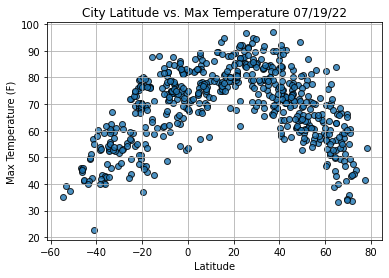

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

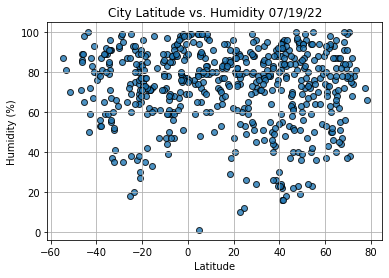

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

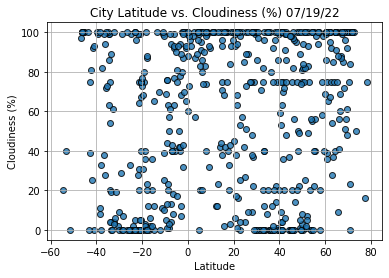

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

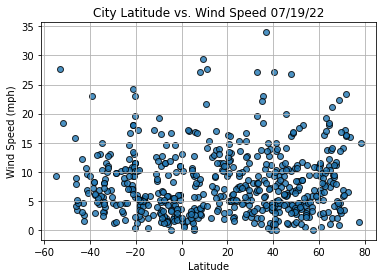

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()